# Tweets about eating disorders
## 02. Pre-processing and initial data cleaning 2


Only 2000 tweets preprocessing. 

In [1]:
import os
import pandas as pd

df = pd.read_csv('tweets_labelled_2000.csv', encoding='utf8', sep=';', error_bad_lines=False)

C:\Users\MICROSOFT\Anaconda3\envs\ED\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.head()

,Column1,stream_group,text_orig,Commercial,POLITICS,ED,Family,ED_patience,ProED,Offensive,Informative,Scientific,Sad,hashtag,Columna2,Columna3
0,0,1,RT @beatED: Learn more about anorexia and buli...,0,0,1,0.0,0,0,0,1,0,0.0,['BBCPanorama'],NaN,NaN
1,3,1,A woman tries to balance her relationships wit...,0,0,1,0.0,0,0,0,0,0,0.0,"['anorexia', 'BodyofWater']",NaN,NaN
2,6,1,not a full on diagnosis but like my therapist ...,0,0,1,0.0,1,0,0,0,0,0.0,[],NaN,NaN
3,11,1,Higher-calorie diets for patients with anorexi...,0,0,1,0.0,0,0,0,1,1,0.0,[],NaN,NaN
4,14,1,tw // ed ment freddie pissed me off but it was...,0,0,1,0.0,1,1,0,0,0,0.0,[],NaN,NaN


In [3]:
df = df.drop(['Column1','Columna2','Columna3','hashtag'], axis=1)

In [4]:
df.columns

Index(['stream_group', 'text_orig', 'Commercial', 'POLITICS', 'ED', 'Family',
       'ED_patience', 'ProED', 'Offensive', 'Informative', 'Scientific',
       'Sad'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
#data2_1.info(memory_usage="deep")

We unite all the data sets into one.

In [6]:
def usageForType(df):
    for ctype in ['float','float64','int64','int','object','datetime','category']:
        columnType = df.select_dtypes(include=[ctype])
        meanMemoryUsage = columnType.memory_usage(deep=True).mean()
        meanMemoryUsageMB = meanMemoryUsage / 1024 ** 2
        print("Memory usage for type ",ctype , " : {:0.5f} MB".format(meanMemoryUsageMB))

In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stream_group  2000 non-null   int64  
 1   text_orig     2000 non-null   object 
 2   Commercial    2000 non-null   int64  
 3   POLITICS      2000 non-null   int64  
 4   ED            2000 non-null   int64  
 5   Family        1733 non-null   float64
 6   ED_patience   2000 non-null   int64  
 7   ProED         2000 non-null   int64  
 8   Offensive     2000 non-null   int64  
 9   Informative   2000 non-null   int64  
 10  Scientific    2000 non-null   int64  
 11  Sad           1728 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 976.2 KB


In [8]:
usageForType(df)

Memory usage for type  float  : 0.01021 MB
Memory usage for type  float64  : 0.01021 MB
Memory usage for type  int64  : 0.01375 MB
Memory usage for type  int  : 0.01375 MB
Memory usage for type  object  : 0.39273 MB
Memory usage for type  datetime  : 0.00012 MB
Memory usage for type  category  : 0.00012 MB


We make a cross between the columns 'id.tweet' and 'retweeted_id' so that we remove all the tweets that are retuits of already existing tweets.

In [9]:
df2 = df.copy()

In [12]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

import preprocessor as p
from preprocessor.api import clean, tokenize, parse
df2['hashtag'] = df2['text_orig'].apply(lambda x: re.findall(r"#(\w+)", x))

def preprocess_tweet(row):
    text = row['text_orig']
    text = clean(text)
    return text

df2['text'] = df2.apply(preprocess_tweet, axis=1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MICROSOFT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MICROSOFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df2['hashtag'].head(10)
df2.shape

(2000, 14)

In [14]:
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
 
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
    
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(df2['text'])
df2['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
df2['text'] = df2['text'].apply(lambda x: [item for item in \
                                    x if item not in stop_words])

C:\Users\MICROSOFT\Anaconda3\envs\ED\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df2['hashtag'].dropna(inplace=True)

In [16]:
tweets2 = df2.copy()

tweets2['hashtag'].head(3)
tweets2 = tweets2.reset_index(drop=True)
tweets2['hashtag'].head(3)

0              [BBCPanorama]
1    [anorexia, BodyofWater]
2                         []
Name: hashtag, dtype: object

In [17]:
tweets = df2.copy()

Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\MICROSOFT\Anaconda3\envs\ED\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


(2000, 14)


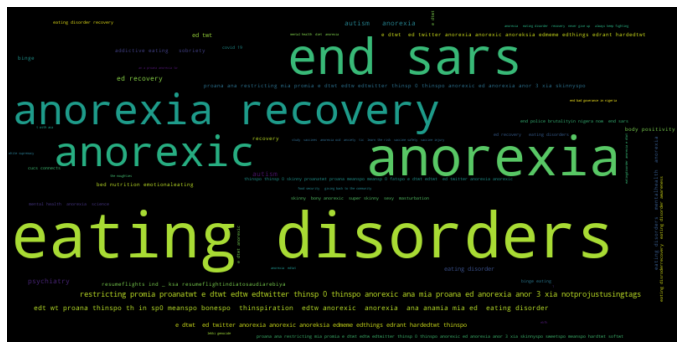

In [18]:
from ekphrasis.classes.segmenter import Segmenter

# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")
a = []

#tweets2 = tweets.copy()
#tweets['hashtag'] = tweets['hashtag'].dropna(inplace=True)
tweets = tweets.reset_index(drop=True)
print(tweets.shape)

for i in range(len(tweets)):
    if tweets['hashtag'][i] != a:
        listToStr1 = ' '.join([str(elem) for elem in \
                                       tweets['hashtag'][i]])
        tweets.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)

#Frequency of words
fdist = FreqDist(tweets['Segmented#'])
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
fdist

FreqDist({'eating disorders': 17, 'anorexia': 12, 'end sars': 10, 'anorexia recovery': 7, 'anorexic': 7, 'restricting promia proanatwt e dtwt edtw edtwitter thinsp 0 thinspo anorexic ana mia proana ed anorexia anor 3 xia notprojustusingtags': 7, 'ed recovery': 6, 'psychiatry': 6, 'autism   anorexia': 6, 'edt wt proana thinspo th in sp0 meanspo bonespo  thinspiration  edtw anorexic  anorexia  ana anamia mia ed  eating disorder': 6, ...})

In [20]:
import difflib
tweets_removing = tweets.copy()
tweets_removing['text_similar'] = tweets_removing.text_orig.apply(lambda row: difflib.get_close_matches(row, list(tweets_removing[tweets_removing.text_orig!=row].text_orig), cutoff = 0.8))


In [21]:
tweets_removing.sort_values(by=['text_similar'], ascending=[0])['text_similar']

640                                                                                                                                   [★𝙉𝙚𝙬 𝙩𝙤 𝙚𝙙 𝙩𝙬𝙩★ ★𝘢𝘨𝘦; 13★ ★𝘊𝘸; 192 🤢★ ★𝘎𝘸; 150 𝘰𝘳 140★ ★𝑹𝒆𝒑𝒍𝒚 𝒘𝒊𝒕𝒉 𝒔𝒐𝒎𝒆 𝒎𝒆𝒂𝒏𝒔𝒑𝒐 𝒑𝒍𝒆𝒂𝒔𝒆★ ★𝑯𝒆𝒓𝒆 𝒊𝒔 𝒔𝒐𝒎𝒆 𝒕𝒉𝒊𝒏𝒔𝒑𝒐 &lt;3★ #EDtwt #ed #anorexic #thinspos https://t.co/Sj49LHvOrj]
641                                                                                                                                [★𝙉𝙚𝙬 𝙩𝙤 𝙚𝙙 𝙩𝙬𝙩★ ★𝘢𝘨𝘦; 13★ ★𝘊𝘸; 192 Nauseated face★ ★𝘎𝘸; 150 𝘰𝘳 140★ ★𝑹𝒆𝒑𝒍𝒚 𝒘𝒊𝒕𝒉 𝒔𝒐𝒎𝒆 𝒎𝒆𝒂𝒏𝒔𝒑𝒐 𝒑𝒍𝒆𝒂𝒔𝒆★ ★𝑯𝒆𝒓𝒆 𝒊𝒔 𝒔𝒐𝒎𝒆 𝒕𝒉𝒊𝒏𝒔𝒑𝒐 &lt;3★ #EDtwt #ed #anorexic https://t.co/j58WSwwKdw]
904                                                                                                                                                                        [thinspo ☆彡 ~ a thread #thinspo #thinsp0 #edtwt #EDtwt #ed #legspo #skinnyspo #anor3xia #anorexic #skinny #edtw https://t.co/0A0jZo1cZm]
808                                                                         

In [22]:
tweets_cleaned = tweets_removing[tweets_removing['text_similar'].apply(lambda x: len(x) < 1)]

In [23]:
tweets_cleaned.to_csv('tweets_cleaned.csv', encoding='utf-8')

In [24]:
import os
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
tweets = pd.read_csv('tweets_cleaned.csv', encoding='utf8', error_bad_lines=False)

C:\Users\MICROSOFT\Anaconda3\envs\ED\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
tweets.head(2)

,Unnamed: 0,stream_group,text_orig,Commercial,POLITICS,ED,Family,ED_patience,ProED,Offensive,Informative,Scientific,Sad,hashtag,text,Segmented#,text_similar
0,0,1,"RT @beatED: Learn more about anorexia and bulimia, as well as other eating disorders, here: https://t.co/Aj2HbjRH39 @BBCPanorama #BBCPanorama",0,0,1,0.0,0,0,0,1,0,0.0,['BBCPanorama'],"['learn', 'anorexia', 'bulimia', 'well', 'eating', 'disorder']",bbc panorama,[]
1,1,1,"A woman tries to balance her relationships with her mother and teenage daughter while under the shadow of #anorexia in the atmospheric British drama #BodyofWater. \n\nAt Depot from Friday, book now: https://lewesdepot.org/film/body-of-water\n",0,0,1,0.0,0,0,0,0,0,0.0,"['anorexia', 'BodyofWater']","['woman', 'try', 'balance', 'relationship', 'mother', 'teenage', 'daughter', 'shadow', 'atmospheric', 'british', 'drama', 'depot', 'friday', 'book']",anorexia bodyof water,[]


In [26]:
tweets.shape

(1877, 17)

In [27]:
tweets.columns=['num1','stream_group','text_orig','f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad','hashtag','text','segmented','text_similar']

In [28]:
tweets.head(2)

,num1,stream_group,text_orig,f1_commercial,f2_politics,f3_ed,f4_family,f5_edpatient,f6_proed,f7_offensive,f8_info,f9_scientific,f10_sad,hashtag,text,segmented,text_similar
0,0,1,"RT @beatED: Learn more about anorexia and bulimia, as well as other eating disorders, here: https://t.co/Aj2HbjRH39 @BBCPanorama #BBCPanorama",0,0,1,0.0,0,0,0,1,0,0.0,['BBCPanorama'],"['learn', 'anorexia', 'bulimia', 'well', 'eating', 'disorder']",bbc panorama,[]
1,1,1,"A woman tries to balance her relationships with her mother and teenage daughter while under the shadow of #anorexia in the atmospheric British drama #BodyofWater. \n\nAt Depot from Friday, book now: https://lewesdepot.org/film/body-of-water\n",0,0,1,0.0,0,0,0,0,0,0.0,"['anorexia', 'BodyofWater']","['woman', 'try', 'balance', 'relationship', 'mother', 'teenage', 'daughter', 'shadow', 'atmospheric', 'british', 'drama', 'depot', 'friday', 'book']",anorexia bodyof water,[]


In [29]:
cols=['f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad']

In [30]:
for col in cols:
    print(tweets[col].value_counts(normalize=True)*100,'\n')

0    98.082046
1     1.917954
Name: f1_commercial, dtype: float64 

0    93.340437
1     6.659563
Name: f2_politics, dtype: float64 

1    88.279169
0    11.720831
Name: f3_ed, dtype: float64 

0.0    99.387255
1.0     0.612745
Name: f4_family, dtype: float64 

1    50.186468
0    49.813532
Name: f5_edpatient, dtype: float64 

0    76.238679
1    23.761321
Name: f6_proed, dtype: float64 

0    96.64358
1     3.35642
Name: f7_offensive, dtype: float64 

0    63.026105
1    36.973895
Name: f8_info, dtype: float64 

0    76.718167
1    23.281833
Name: f9_scientific, dtype: float64 

0.0    76.705593
1.0    16.226183
2.0     7.068224
Name: f10_sad, dtype: float64 



In [31]:
megaDF = pd.DataFrame()
megaDF.rename_axis('values')
cols2 = cols[:-1]
for col in cols2:
    df = tweets[col].value_counts(normalize=True).rename_axis('valores').to_frame(col)
    #df.plot.bar()
    #megaDF.concat([megaDF,df])
    megaDF = pd.concat([megaDF,df], axis=1)
    #plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'f1_commercial'),
  Text(1, 0, 'f2_politics'),
  Text(2, 0, 'f3_ed'),
  Text(3, 0, 'f4_family'),
  Text(4, 0, 'f5_edpatient'),
  Text(5, 0, 'f6_proed'),
  Text(6, 0, 'f7_offensive'),
  Text(7, 0, 'f8_info'),
  Text(8, 0, 'f9_scientific')])

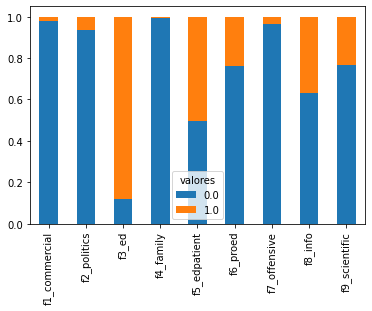

In [32]:
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'f5_edpatient'),
  Text(1, 0, 'f6_proed'),
  Text(2, 0, 'f8_info'),
  Text(3, 0, 'f9_scientific')])

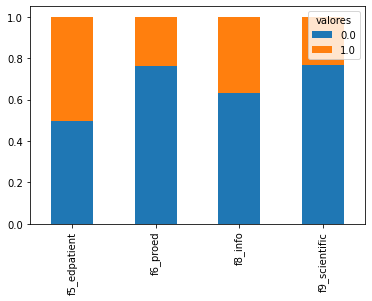

In [33]:
tweets1 = tweets.copy().drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive', 'f10_sad'], axis=1)
megaDF=megaDF.drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive'],axis=1)
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

In [34]:
tweets1.head(2)

,num1,stream_group,text_orig,f5_edpatient,f6_proed,f8_info,f9_scientific,hashtag,text,segmented,text_similar
0,0,1,"RT @beatED: Learn more about anorexia and bulimia, as well as other eating disorders, here: https://t.co/Aj2HbjRH39 @BBCPanorama #BBCPanorama",0,0,1,0,['BBCPanorama'],"['learn', 'anorexia', 'bulimia', 'well', 'eating', 'disorder']",bbc panorama,[]
1,1,1,"A woman tries to balance her relationships with her mother and teenage daughter while under the shadow of #anorexia in the atmospheric British drama #BodyofWater. \n\nAt Depot from Friday, book now: https://lewesdepot.org/film/body-of-water\n",0,0,0,0,"['anorexia', 'BodyofWater']","['woman', 'try', 'balance', 'relationship', 'mother', 'teenage', 'daughter', 'shadow', 'atmospheric', 'british', 'drama', 'depot', 'friday', 'book']",anorexia bodyof water,[]


In [35]:
import pandas as pd
import numpy as np

import spacy
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import regex as re
import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from simpletransformers.classification import ClassificationModel


import io

C:\Users\MICROSOFT\Anaconda3\envs\ED\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] No se puede encontrar el módulo especificado
  warn(f"Failed to load image Python extension: {e}")


In [36]:
punctuations = "¡!#$%&'()*+,-./:;<=>¿?@[\]^_`{|}~"

def read_txt(filename):
    list = []
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.readlines()
        for line in data:
            list.append(str(line).replace('\n', ''))
    return list

stopwords = read_txt('english_stopwords.txt')

stemmer = SnowballStemmer('english')


def clean_accents(tweet):
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)

    return tweet

def clean_tweet(tweet, stem = False):
    tweet = tweet.lower().strip()
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet = re.sub(r'http?:\/\/\S+', '', tweet)
    tweet = re.sub(r'www?:\/\/\S+', '', tweet)
    tweet = re.sub(r'\s([@#][\w_-]+)', "", tweet)
    tweet = re.sub(r"\n", " ", tweet)
    tweet = clean_accents(tweet)
    tweet = re.sub(r"\b(a*ha+h[ha]*|o?l+o+l+[ol]*|x+d+[x*d*]*|a*ja+[j+a+]+)\b", "<risas>", tweet)
    for symbol in punctuations:
        tweet = tweet.replace(symbol, "")
    tokens = []
    for token in tweet.strip().split():
        if token not in punctuations and token not in stopwords:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [37]:
tweets1['text_cleaned'] = tweets['text_orig'].apply(lambda s : clean_tweet(s))
print(tweets1['text_cleaned'].head(5))

0                                                                   rt learn anorexia bulimia well eating disorders
1      woman tries balance relationships mother teenage daughter shadow atmospheric british drama depot friday book
2                           full diagnosis like therapist legit told mom anorexia nevrususu poor mom sat like 👁👄👁oh
3                                          highercalorie diets patients anorexia nervosa shorten hospital stays via
4    tw ed ment freddie pissed amazing way got anorexic bulimic actress play foodobsessed character never sit right
Name: text_cleaned, dtype: object


In [38]:
tweets1.head(2)

,num1,stream_group,text_orig,f5_edpatient,f6_proed,f8_info,f9_scientific,hashtag,text,segmented,text_similar,text_cleaned
0,0,1,"RT @beatED: Learn more about anorexia and bulimia, as well as other eating disorders, here: https://t.co/Aj2HbjRH39 @BBCPanorama #BBCPanorama",0,0,1,0,['BBCPanorama'],"['learn', 'anorexia', 'bulimia', 'well', 'eating', 'disorder']",bbc panorama,[],rt learn anorexia bulimia well eating disorders
1,1,1,"A woman tries to balance her relationships with her mother and teenage daughter while under the shadow of #anorexia in the atmospheric British drama #BodyofWater. \n\nAt Depot from Friday, book now: https://lewesdepot.org/film/body-of-water\n",0,0,0,0,"['anorexia', 'BodyofWater']","['woman', 'try', 'balance', 'relationship', 'mother', 'teenage', 'daughter', 'shadow', 'atmospheric', 'british', 'drama', 'depot', 'friday', 'book']",anorexia bodyof water,[],woman tries balance relationships mother teenage daughter shadow atmospheric british drama depot friday book


In [ ]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total}')
print(f'free     : {info.free}')
print(f'used     : {info.used}')